<a href="https://colab.research.google.com/github/elianekelm/IA_PUC_Minas/blob/master/RegressaoLinear_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear, Ridge e Lasso**

Realiza uma análise comparativa entre a Regressão Linear, o Ridge e o Lasso no Boston Housing Dataset.

Baseado no livro: Andreas C. Muller, Sarah Guido (2016) Introduction to Machine Learning with Python: A Guide for Data Scientists 1st Edition.

Este notebook foi desenvolvido para o ambiente Google Colab.

Prof.: Hudo de Paula - PUC Minas

## **Base de dados: Boston Housing dataset**

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

- 506 registros
- 13 atributos


In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
boston = load_boston()
X = boston.data
print(f"Número de atributos original: \n{X.shape}")


Número de atributos original: 
(506, 13)


In [ ]:
# O PolynomialFeatures() aumenta a dimensão dos dados produzindo novos atributos
# que são combinações lineares dos dados originais

X = MinMaxScaler().fit_transform(boston.data)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print(f"Polynomial Features (atributos redundantes): \n{X.shape}")
y = boston.target

Polynomial Features (atributos redundantes): 
(506, 104)


## **Regressão Linear**

Os passos para indução de um modelo são:

  1. Instanciar o modelo: LinearRegression()
  2. Treinar o modelo: fit()

O método score() retorna o coeficiente R^2 de predição.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (com atributos redundantes)".upper())
print(f"\nAcurácia na base de treinamento: {lr.score(X_train, y_train):.2f}")
print(f"Acurácia na base de teste: {lr.score(X_test, y_test):.2f}")

REGRESSÃO LINEAR (COM ATRIBUTOS REDUNDANTES)

Acurácia na base de treinamento: 0.95
Acurácia na base de teste: 0.61


## **Ridge (Regressão Linear com regularização L2)**

Força uma redução do valor dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância do sinal.

A força da regularização é dada pelo atributo alpha, com valor *default* igual a 1.

In [ ]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge alpha = 1".upper())  
print(f"Acurácia na base de treinamento: {ridge.score(X_train, y_train):.2f}")
print(f"Acurácia na base de teste: {ridge.score(X_test, y_test):.2f}")

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("\nRidge alpha = 10".upper())
print(f"Acurácia na base de treinamento: {ridge10.score(X_train, y_train):.2f}")
print(f"Acurácia na base de teste: {ridge10.score(X_test, y_test):.2f}")

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("\nRidge alpha = 0.1".upper())
print(f"Acurácia na base de treinamento: {ridge01.score(X_train, y_train):.2f}")
print(f"Acurácia na base de teste: {ridge01.score(X_test, y_test):.2f}")


RIDGE ALPHA = 1
Acurácia na base de treinamento: 0.89
Acurácia na base de teste: 0.75

RIDGE ALPHA = 10
Acurácia na base de treinamento: 0.79
Acurácia na base de teste: 0.64

RIDGE ALPHA = 0.1
Acurácia na base de treinamento: 0.93
Acurácia na base de teste: 0.77


## **Comparação da Regressão Linear e Ridge**

O gráfico exibe a magnitude dos coeficientes obtidos por cada método. Pode-se observar como a regularização afeta a magnitude dos coeficientes do Ridge como um todo, mas sem zerar coeficientes de uma forma geral.

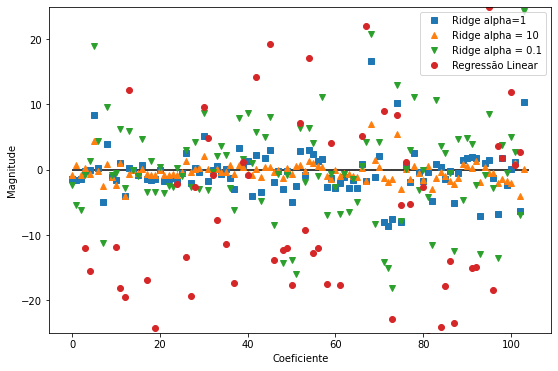

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha = 0.1")
plt.plot(lr.coef_, 'o', label="Regressão Linear")
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## **LASSO (Regressão linear com regularização L1)**

Força uma redução do valor dos coeficientes, podendo zerar diversos coeficientes cujos atributos não contribuem significativamente para a previsão. Muito utilizado no apoio à tarefa de seleção de atributos *(feature selection)*.

A força da regularização é dada pelo atributo *alpha*, com valor default igual a 1. Alpha=0 resulta na regressão linear tradicional.

In [ ]:
lasso = Lasso().fit(X_train, y_train)
print("Lasso alpha = 1".upper())
print(f"Acurácia na base de treinamento: {lasso.score(X_train, y_train):.2f}")
print(f"Acurácia na base de teste: {lasso.score(X_test, y_test):.2f}")
print(f"Número de atributos usados: {np.sum(lasso.coef_!= 0)}")

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("\nLasso alpha = 0.01".upper())
print(f"Acurácia na base de treinamento: {lasso001.score(X_train, y_train):.2f}")
print(f"Acurácia na base de teste: {lasso001.score(X_test, y_test):.2f}")
print(f"Número de atributos usados: {np.sum(lasso001.coef_!= 0)}")


lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("\nLasso alpha = 0.0001".upper())
print(f"Acurácia na base de treinamento: {lasso00001.score(X_train, y_train):.2f}")
print(f"Acurácia na base de teste: {lasso00001.score(X_test, y_test):.2f}")
print(f"Número de atributos usados: {np.sum(lasso00001.coef_!= 0)}")



LASSO ALPHA = 1
Acurácia na base de treinamento: 0.29
Acurácia na base de teste: 0.21
Número de atributos usados: 4

LASSO ALPHA = 0.01
Acurácia na base de treinamento: 0.90
Acurácia na base de teste: 0.77
Número de atributos usados: 33

LASSO ALPHA = 0.0001
Acurácia na base de treinamento: 0.95
Acurácia na base de teste: 0.64
Número de atributos usados: 96


## **Comparação do LASSO e Ridge**

O gráfico exibe a magnitude dos coeficientes obtidos por cada método.

Text(0, 0.5, 'Magnitude')

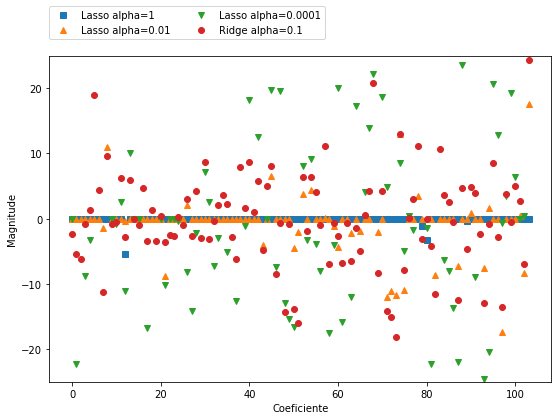

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")